<a href="https://colab.research.google.com/github/zahraDehghanian97/Multilayer_Perceptron/blob/master/MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# prerequisit

In [33]:
try :
  %tensorflow_version 2.x
except:
  pass
import tensorflow as tf
from tensorflow import keras
import numpy as np
from csv import reader
import matplotlib.pyplot as plt
import random
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical


## mount google drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AY0e-g71YkuzkjS6fFKZ2GywhViMSmKAK12ZwfQ2sCIEDVm4XBjuufcxdRU
Mounted at /content/drive


# **make dataset ready**

In [13]:
def load_csv(filename):
    dataset = list()
    with open(filename, 'r') as file:
        csv_reader = reader(file)
        for row in csv_reader:
            if not row:
                continue
            dataset.append(row)
    return dataset

def str_column_to_float(dataset, column):
    for row in dataset:
        row[column] = float(row[column].strip())

filename = "/content/drive/MyDrive/Colab Notebooks/YearPredictionMSD.txt"
dataset = load_csv(filename)
for i in range(len(dataset[0])):
    str_column_to_float(dataset, i)
print(dataset[:20])


NameError: ignored

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()
y =preprocessing.LabelEncoder().fit_transform( np.array(dataset)[:,0])
features= preprocessing.MinMaxScaler().fit_transform(np.array(dataset)[:,1:])

In [121]:
Processed_set = []
for i in range(len(y)):
  temp =np.append( np.array(y[i]) , np.array(features[i]))
  Processed_set.append(temp)
print(Processed_set[0])
np.random.shuffle(Processed_set)


[7.80000000e+01 8.00293219e-01 4.97205225e-01 5.99629187e-01
 3.32544942e-01 3.70582992e-01 2.76962114e-01 4.52563592e-01
 3.02498149e-01 4.92379984e-01 3.84045679e-01 4.62913429e-01
 5.04117222e-01 1.83263138e-02 9.16871500e-03 2.52713872e-02
 2.13704546e-02 1.99878511e-02 2.24760321e-02 2.58129091e-02
 2.42440359e-02 2.55181436e-02 4.63679922e-02 1.40112924e-02
 1.77423165e-02 5.77498394e-01 3.45193598e-01 4.56705929e-01
 5.65312966e-01 4.91583927e-01 4.64464992e-01 6.18817797e-01
 4.46819228e-01 3.70233885e-01 4.06023180e-01 3.55862331e-01
 4.06671587e-01 3.67944658e-01 5.51502873e-01 6.15449994e-01
 4.89803927e-01 5.64616754e-01 5.17168240e-01 8.01435415e-01
 3.64981845e-01 5.86668117e-01 5.18611863e-01 6.24704895e-01
 3.86235546e-01 5.17537079e-01 5.38589234e-01 6.07256952e-01
 4.14216091e-01 5.73448302e-01 4.39450966e-01 7.45339085e-01
 4.23885508e-01 2.92904934e-01 2.70411461e-01 4.12235326e-01
 2.99791176e-01 5.09735450e-01 5.92735933e-01 4.17237449e-01
 4.79123612e-01 7.113464

In [123]:
temp_set = Processed_set[:1000]
train_validate, test = np.split(temp_set, [int(.9*len(temp_set))])
print(len(train_validate),len(test))
num_clasess = len(np.unique(np.array(Processed_set)[:,0]))
x_train = train_validate[:,1:]
y_train = train_validate[:,0]
x_test = test[:,1:]
y_test = test[:,0]

900 100


# **make Model Classification**

# number of layers

model 90-500-250-125-89

In [127]:
# create model 
model_classification = keras.models.Sequential()
model_classification.add(keras.Input(shape=x_train.shape[1]))
model_classification.add(keras.layers.Dense(500, activation='relu'))
model_classification.add(keras.layers.Dense(250, activation='relu'))
model_classification.add(keras.layers.Dense(125, activation='relu'))
model_classification.add(keras.layers.Dense(num_clasess, activation='softmax'))
# Compile model
model_classification.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_classification.summary()
# fit model on the dataset
history_classification = model_classification.fit(x_train,y_train,verbose=False, epochs=200,validation_split=2/9)
loss_classification, acc_classification = model_classification.evaluate(x_test,y_test, verbose = 2)

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_61 (Dense)             (None, 500)               45500     
_________________________________________________________________
dense_62 (Dense)             (None, 250)               125250    
_________________________________________________________________
dense_63 (Dense)             (None, 125)               31375     
_________________________________________________________________
dense_64 (Dense)             (None, 89)                11214     
Total params: 213,339
Trainable params: 213,339
Non-trainable params: 0
_________________________________________________________________
4/4 - 0s - loss: 4.0891 - accuracy: 0.0700


*model* 90-250-125-89

In [128]:
# create model 
model_classification = keras.models.Sequential()
model_classification.add(keras.Input(shape=x_train.shape[1]))
model_classification.add(keras.layers.Dense(250, activation='relu'))
model_classification.add(keras.layers.Dense(125, activation='relu'))
model_classification.add(keras.layers.Dense(num_clasess, activation='softmax'))
# Compile model
model_classification.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_classification.summary()
# fit model on the dataset
history_classification = model_classification.fit(x_train,y_train,verbose=False, epochs=200,validation_split=2/9)
loss_classification, acc_classification = model_classification.evaluate(x_test,y_test, verbose = 2)

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_65 (Dense)             (None, 250)               22750     
_________________________________________________________________
dense_66 (Dense)             (None, 125)               31375     
_________________________________________________________________
dense_67 (Dense)             (None, 89)                11214     
Total params: 65,339
Trainable params: 65,339
Non-trainable params: 0
_________________________________________________________________
4/4 - 0s - loss: 3.5013 - accuracy: 0.0800


model 90-125-89

In [129]:
# create model 
model_classification = keras.models.Sequential()
model_classification.add(keras.Input(shape=x_train.shape[1]))
model_classification.add(keras.layers.Dense(125, activation='relu'))
model_classification.add(keras.layers.Dense(num_clasess, activation='softmax'))
# Compile model
model_classification.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_classification.summary()
# fit model on the dataset
history_classification = model_classification.fit(x_train,y_train,verbose=False, epochs=200,validation_split=2/9)
loss_classification, acc_classification = model_classification.evaluate(x_test,y_test, verbose = 2)

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_68 (Dense)             (None, 125)               11375     
_________________________________________________________________
dense_69 (Dense)             (None, 89)                11214     
Total params: 22,589
Trainable params: 22,589
Non-trainable params: 0
_________________________________________________________________
4/4 - 0s - loss: 3.5099 - accuracy: 0.0400


# learning rate

learning rate = 0.1

In [130]:
# create model 
model_classification = keras.models.Sequential()
model_classification.add(keras.Input(shape=x_train.shape[1]))
model_classification.add(keras.layers.Dense(250, activation='relu'))
model_classification.add(keras.layers.Dense(125, activation='relu'))
model_classification.add(keras.layers.Dense(num_clasess, activation='softmax'))
# Compile model
model_classification.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.1), metrics=['accuracy'])
# model_classification.summary()
# fit model on the dataset
history_classification = model_classification.fit(x_train,y_train,verbose=False, epochs=200,validation_split=2/9)
loss_classification, acc_classification = model_classification.evaluate(x_test,y_test, verbose = 2)

4/4 - 0s - loss: 3.5106 - accuracy: 0.0600


learning rate = 0.01

In [131]:
# create model 
model_classification = keras.models.Sequential()
model_classification.add(keras.Input(shape=x_train.shape[1]))
model_classification.add(keras.layers.Dense(250, activation='relu'))
model_classification.add(keras.layers.Dense(125, activation='relu'))
model_classification.add(keras.layers.Dense(num_clasess, activation='softmax'))
# Compile model
model_classification.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.01), metrics=['accuracy'])
# model_classification.summary()
# fit model on the dataset
history_classification = model_classification.fit(x_train,y_train,verbose=False, epochs=200,validation_split=2/9)
loss_classification, acc_classification = model_classification.evaluate(x_test,y_test, verbose = 2)

4/4 - 0s - loss: 3.4697 - accuracy: 0.0500


learning rate = 0.001

In [133]:
# create model 
model_classification = keras.models.Sequential()
model_classification.add(keras.Input(shape=x_train.shape[1]))
model_classification.add(keras.layers.Dense(250, activation='relu'))
model_classification.add(keras.layers.Dense(125, activation='relu'))
model_classification.add(keras.layers.Dense(num_clasess, activation='softmax'))
# Compile model
model_classification.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])
# model_classification.summary()
# fit model on the dataset
history_classification = model_classification.fit(x_train,y_train,verbose=False, epochs=200,validation_split=2/9)
loss_classification, acc_classification = model_classification.evaluate(x_test,y_test, verbose = 2)

4/4 - 0s - loss: 3.5908 - accuracy: 0.0700


# number of neurons

model 90-300-150-89

In [134]:
# create model 
model_classification = keras.models.Sequential()
model_classification.add(keras.Input(shape=x_train.shape[1]))
model_classification.add(keras.layers.Dense(300, activation='relu'))
model_classification.add(keras.layers.Dense(150, activation='relu'))
model_classification.add(keras.layers.Dense(num_clasess, activation='softmax'))
# Compile model
model_classification.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_classification.summary()
# fit model on the dataset
history_classification = model_classification.fit(x_train,y_train,verbose=False, epochs=200,validation_split=2/9)
loss_classification, acc_classification = model_classification.evaluate(x_test,y_test, verbose = 2)

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_82 (Dense)             (None, 300)               27300     
_________________________________________________________________
dense_83 (Dense)             (None, 150)               45150     
_________________________________________________________________
dense_84 (Dense)             (None, 89)                13439     
Total params: 85,889
Trainable params: 85,889
Non-trainable params: 0
_________________________________________________________________
4/4 - 0s - loss: 3.6666 - accuracy: 0.0300


model 90-500-250-89

In [135]:
# create model 
model_classification = keras.models.Sequential()
model_classification.add(keras.Input(shape=x_train.shape[1]))
model_classification.add(keras.layers.Dense(500, activation='relu'))
model_classification.add(keras.layers.Dense(250, activation='relu'))
model_classification.add(keras.layers.Dense(num_clasess, activation='softmax'))
# Compile model
model_classification.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_classification.summary()
# fit model on the dataset
history_classification = model_classification.fit(x_train,y_train,verbose=False, epochs=200,validation_split=2/9)
loss_classification, acc_classification = model_classification.evaluate(x_test,y_test, verbose = 2)

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_85 (Dense)             (None, 500)               45500     
_________________________________________________________________
dense_86 (Dense)             (None, 250)               125250    
_________________________________________________________________
dense_87 (Dense)             (None, 89)                22339     
Total params: 193,089
Trainable params: 193,089
Non-trainable params: 0
_________________________________________________________________
4/4 - 0s - loss: 3.7679 - accuracy: 0.0500


model 90-200-100-89

In [136]:
# create model 
model_classification = keras.models.Sequential()
model_classification.add(keras.Input(shape=x_train.shape[1]))
model_classification.add(keras.layers.Dense(200, activation='relu'))
model_classification.add(keras.layers.Dense(100, activation='relu'))
model_classification.add(keras.layers.Dense(num_clasess, activation='softmax'))
# Compile model
model_classification.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_classification.summary()
# fit model on the dataset
history_classification = model_classification.fit(x_train,y_train,verbose=False, epochs=200,validation_split=2/9)
loss_classification, acc_classification = model_classification.evaluate(x_test,y_test, verbose = 2)

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_88 (Dense)             (None, 200)               18200     
_________________________________________________________________
dense_89 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_90 (Dense)             (None, 89)                8989      
Total params: 47,289
Trainable params: 47,289
Non-trainable params: 0
_________________________________________________________________
4/4 - 0s - loss: 3.4708 - accuracy: 0.0500


# plot best result

Model: "sequential_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_115 (Dense)            (None, 250)               22750     
_________________________________________________________________
dense_116 (Dense)            (None, 125)               31375     
_________________________________________________________________
dense_117 (Dense)            (None, 89)                11214     
Total params: 65,339
Trainable params: 65,339
Non-trainable params: 0
_________________________________________________________________
4/4 - 0s - loss: 3.6319 - accuracy: 0.0700


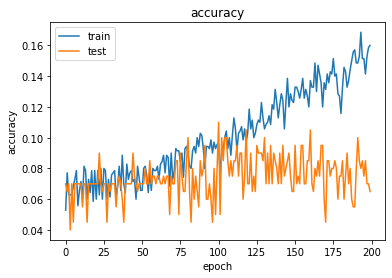

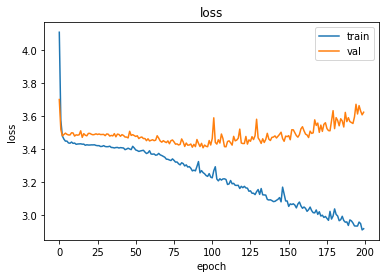

In [145]:
# create model 
model_classification = keras.models.Sequential()
model_classification.add(keras.Input(shape=x_train.shape[1]))
model_classification.add(keras.layers.Dense(250, activation='relu'))
model_classification.add(keras.layers.Dense(125, activation='relu'))
model_classification.add(keras.layers.Dense(num_clasess, activation='softmax'))
# Compile model
model_classification.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_classification.summary()
# fit model on the dataset
history_classification = model_classification.fit(x_train,y_train,verbose=False, epochs=200,validation_split=2/9)
loss_classification, acc_classification = model_classification.evaluate(x_test,y_test, verbose = 2)
# plot model accuracy and loss 
plt.plot(history_classification.history['accuracy'])
plt.plot(history_classification.history['val_accuracy'])
plt.title('accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()
plt.plot(history_classification.history['loss'])
plt.plot(history_classification.history['val_loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')
plt.show()

# **make Model Regression**

In [104]:
# create model
model_regression = keras.models.Sequential()
model_regression.add(keras.Input(shape=x_train.shape[1]))
model_regression.add(keras.layers.Dense(512, activation='relu'))
model_regression.add(keras.layers.Dense(100, activation='sigmoid'))
model_regression.add(keras.layers.Dense(1, activation='linear'))
# Compile model
model_regression.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_squared_error'])
model_regression.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 512)               46592     
_________________________________________________________________
dense_49 (Dense)             (None, 100)               51300     
_________________________________________________________________
dense_50 (Dense)             (None, 1)                 101       
Total params: 97,993
Trainable params: 97,993
Non-trainable params: 0
_________________________________________________________________


train and test data

In [105]:
# fit model on the dataset
print(x_train.shape)
print(y_train.shape)
history_regression = model_regression.fit(x_train,y_train, epochs=500,verbose= False,validation_split=2/9)
loss_regression, acc_regression = model_regression.evaluate(x_test,y_test, verbose = 2)

(900, 90)
(900,)
4/4 - 0s - loss: 0.0833 - mean_squared_error: 0.0207


plot result

{'loss': [0.1609950065612793, 0.09778811037540436, 0.0923716276884079, 0.08744744211435318, 0.08794603496789932, 0.08698433637619019, 0.08767618983983994, 0.08698304742574692, 0.08709760755300522, 0.08995869010686874, 0.09030353277921677, 0.08649341762065887, 0.08949050307273865, 0.09013132005929947, 0.08751308172941208, 0.08751381188631058, 0.09014029055833817, 0.08781297504901886, 0.08635952323675156, 0.09279679507017136, 0.09437598288059235, 0.08789883553981781, 0.08811245858669281, 0.08506261557340622, 0.0857151597738266, 0.08630942553281784, 0.08580639213323593, 0.087026447057724, 0.08451931178569794, 0.08886466175317764, 0.0849703997373581, 0.08592788875102997, 0.08446986228227615, 0.08422085642814636, 0.08378001302480698, 0.08388855308294296, 0.08523104339838028, 0.08295328170061111, 0.08281045407056808, 0.0895770937204361, 0.08986515551805496, 0.0856158509850502, 0.08446948230266571, 0.08526911586523056, 0.0840282216668129, 0.0864197313785553, 0.09084396064281464, 0.08396368473

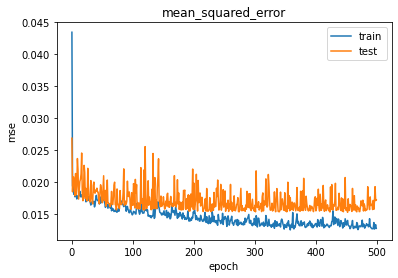

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Unrecognized location 'upper best'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


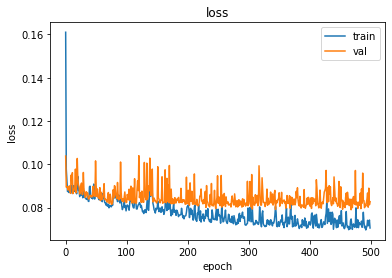

In [110]:
# plot model accuracy and loss 
# mean squere error
print(history_regression.history)
plt.plot(history_regression.history['mean_squared_error'])
plt.plot(history_regression.history['val_mean_squared_error'])
plt.title('mean_squared_error')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()
# loss
plt.plot(history_regression.history['loss'])
plt.plot(history_regression.history['val_loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper best')
plt.show()